In [2]:
import xarray as xr
from matplotlib import pyplot as plt
import matplotlib as mpl
from cartopy import crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import numpy as np
import warnings as wn
%load_ext autoreload
%autoreload 2
import esm2m.myfunctions as func

In [3]:
rootdir = '/local/ss23/GFDL_LEs/'
experiment = 'OCN/METABOLIC_INDEX/RCP85'
filename = 'MI_hitemp_sens_k01_ens*_1x1_1950_2100.nc'
path = rootdir+experiment+'/'+filename
ds_all = xr.open_mfdataset(path, engine='netcdf4', concat_dim='ensemble', combine='nested')
ds_avg = ds_all.sel(ensemble=30)
ds_all = ds_all.sel(ensemble=slice(0,30),time=slice('1990-01-01','2100-12-31'))

In [4]:
experiment26 = 'OCN/METABOLIC_INDEX/RCP26'
filename = 'MI_hitemp_sens_k01_ens*_1x1_2006_2100.nc'
path = rootdir+experiment26+'/'+filename
ds_all26 = xr.open_mfdataset(path, engine='netcdf4', concat_dim='ensemble', combine='nested')
ds_avg26 = ds_all26.sel(ensemble=30)
ds_all26 = ds_all26.sel(ensemble=slice(0,29))

In [5]:
filename = 'MI_hitemp_sens_k11_ens*_1x1_2006_2100.nc'
path = rootdir+experiment26+'/'+filename
k11_all26 = xr.open_mfdataset(path, engine='netcdf4', concat_dim='ensemble', combine='nested')
k11_avg26 = k11_all26.sel(ensemble=30)
k11_all26 = k11_all26.sel(ensemble=slice(0,29))

In [6]:
filename = 'MI_hitemp_sens_k11_ens*_1x1_1950_2100.nc'
path = rootdir+experiment+'/'+filename
k11_all = xr.open_mfdataset(path, engine='netcdf4', concat_dim='ensemble', combine='nested')
k11_avg = k11_all.sel(ensemble=30)
k11_all = k11_all.sel(ensemble=slice(0,29),time=slice('1990-01-01','2100-12-31'))

In [6]:
z0_red = ~np.isnan(ds_all.where(ds_all['MI']<1.0))
z0red_mean = z0_red.mean(dim='ensemble')
z0_or = ~np.isnan(ds_all.where(ds_all['MI']<2.0))
z0or_mean = z0_or.mean(dim='ensemble')
z0_yel = ~np.isnan(ds_all.where(ds_all['MI']<3.0))
z0yel_mean = z0_yel.mean(dim='ensemble')
z0_gre = ~np.isnan(ds_all.where(ds_all['MI']<4.0))
z0gre_mean = z0_gre.mean(dim='ensemble')

In [7]:
k11_red = ~np.isnan(k11_all.where(k11_all['MI']<1.0))
k11red_mean = k11_red.mean(dim='ensemble')
k11_or = ~np.isnan(k11_all.where(k11_all['MI']<2.0))
k11or_mean = k11_or.mean(dim='ensemble')
k11_yel = ~np.isnan(k11_all.where(k11_all['MI']<3.0))
k11yel_mean = k11_yel.mean(dim='ensemble')
k11_gre = ~np.isnan(k11_all.where(k11_all['MI']<4.0))
k11gre_mean = k11_gre.mean(dim='ensemble')

In [8]:
z0_red26 = ~np.isnan(ds_all26.where(ds_all26['MI']<1.0))
z0red_mean26 = z0_red26.mean(dim='ensemble')
z0_or26 = ~np.isnan(ds_all26.where(ds_all26['MI']<2.0))
z0or_mean26 = z0_or26.mean(dim='ensemble')
z0_yel26 = ~np.isnan(ds_all26.where(ds_all26['MI']<3.0))
z0yel_mean26 = z0_yel26.mean(dim='ensemble')
z0_gre26 = ~np.isnan(ds_all26.where(ds_all26['MI']<4.0))
z0gre_mean26 = z0_gre26.mean(dim='ensemble')

In [9]:
k11_red26 = ~np.isnan(k11_all26.where(k11_all26['MI']<1.0))
k11red_mean26 = k11_red26.mean(dim='ensemble')
z0_or26 = ~np.isnan(ds_all26.where(ds_all26['MI']<2.0))
z0or_mean26 = z0_or26.mean(dim='ensemble')
z0_yel26 = ~np.isnan(ds_all26.where(ds_all26['MI']<3.0))
z0yel_mean26 = z0_yel26.mean(dim='ensemble')
z0_gre26 = ~np.isnan(ds_all26.where(ds_all26['MI']<4.0))
z0gre_mean26 = z0_gre26.mean(dim='ensemble')

In [7]:
def ds_month(ds, thresh):
    mi = ds.squeeze()
    mi_thresh = ~np.isnan(mi.where(mi['MI']<thresh))
    mi_month = mi_thresh.groupby('time.year').sum(dim='time')
    mi_mean = mi_month.mean(dim='ensemble')
    return mi_mean

In [8]:
z0_red85 = ds_month(ds_all, 1.0)
z0_or85 = ds_month(ds_all, 2.0)
z0_yel85 = ds_month(ds_all, 3.0)
z0_gr85 = ds_month(ds_all, 4.0)

k11_red85 = ds_month(k11_all, 1.0)
k11_or85 = ds_month(k11_all, 2.0)
k11_yel85 = ds_month(k11_all, 3.0)
k11_gr85 = ds_month(k11_all, 4.0)

z0_red26 = ds_month(ds_all26, 1.0)
z0_or26 = ds_month(ds_all26, 2.0)
z0_yel26 = ds_month(ds_all26, 3.0)
z0_gr26 = ds_month(ds_all26, 4.0)

k11_red26 = ds_month(k11_all26, 1.0)
k11_or26 = ds_month(k11_all26, 2.0)
k11_yel26 = ds_month(k11_all26, 3.0)
k11_gr26 = ds_month(k11_all26, 4.0)

In [9]:
z0_red85

<xarray.Dataset>
Dimensions:   (xt_ocean: 360, year: 111, yt_ocean: 180)
Coordinates:
    st_ocean  float64 5.0
  * yt_ocean  (yt_ocean) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * xt_ocean  (xt_ocean) float64 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * year      (year) int64 1990 1991 1992 1993 1994 ... 2096 2097 2098 2099 2100
Data variables:
    MI        (year, yt_ocean, xt_ocean) float64 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>

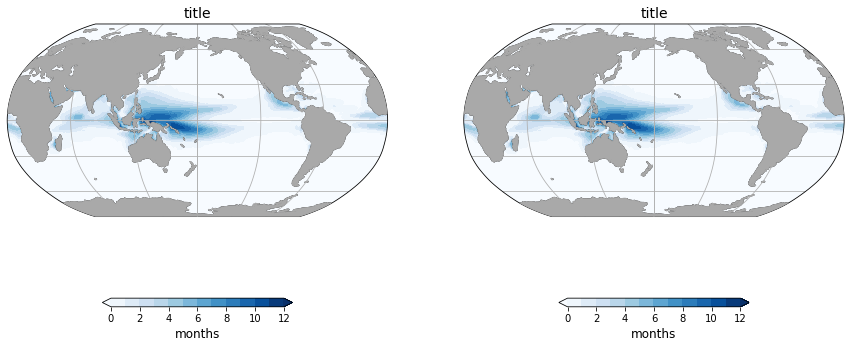

In [14]:
fig,(ax0,ax1) = plt.subplots(figsize=(15,30),nrows=1,ncols=2,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
ds = ds_all.sel(time=slice('2100-01-01','2100-12-31'))
ds_red = ~np.isnan(ds.where(ds['MI']<1.0))
ds_sum = ds_red.sum(dim='time')
ds_sum = ds_sum.mean(dim='ensemble')
wn.filterwarnings('ignore')
clevs = np.array([10,11,12])
months = [0,1,2,3,4,5,6,7,8,9,10,11,12]
colrange = ['red','blue']
crs = ccrs.PlateCarree()
X = ds_sum['xt_ocean']
Y = ds_sum['yt_ocean']
Z = ds_sum['MI'].squeeze()
Z, X = add_cyclic_point(Z,coord=X)
im = ax0.contourf(X,Y,Z,months,cmap='Blues',transform=crs,extend='both')
# Add a land mask to your plot, as well as grid lines and coastlines
ax0.add_feature(cfeature.LAND,zorder=10,facecolor='darkgray')
ax0.gridlines()
ax0.coastlines()
ax0.set_title('title',fontsize=14,loc='center')
cbar = plt.colorbar(im,ax=ax0,orientation='horizontal',fraction=0.05,pad=0.05,shrink=0.5)
cbar.set_label('months',fontsize=12)

ds = mi_mean.sel(year=2100)
X = ds['xt_ocean']
Y = ds['yt_ocean']
Z = ds['MI']
Z, X = add_cyclic_point(Z,coord=X)
im = ax1.contourf(X,Y,Z,months,cmap='Blues',transform=crs,extend='both')
# Add a land mask to your plot, as well as grid lines and coastlines
ax1.add_feature(cfeature.LAND,zorder=10,facecolor='darkgray')
ax1.gridlines()
ax1.coastlines()
ax1.set_title('title',fontsize=14,loc='center')
cbar = plt.colorbar(im,ax=ax1,orientation='horizontal',fraction=0.05,pad=0.05,shrink=0.5)
cbar.set_label('months',fontsize=12)

In [54]:
def map_months(plot, ds, cmap, title, year):
    ds_sum = ds.sel(year=year)
    wn.filterwarnings('ignore')
    months = [0,1,2,3,4,5,6,7,8,9,10,11,12]
    bounds = np.arange(1,13,1)
    crs = ccrs.PlateCarree()
    X = ds_sum['xt_ocean']
    Y = ds_sum['yt_ocean']
    Z = ds_sum['MI'].squeeze()
    Z, X = add_cyclic_point(Z,coord=X)
    im = plot.contourf(X,Y,Z,months,cmap=cmap,transform=crs,extend='min')
    
    # Add a land mask to your plot, as well as grid lines and coastlines
    plot.add_feature(cfeature.LAND,zorder=10,facecolor='darkgray')
    plot.gridlines()
    plot.coastlines()
    plot.set_title(title,fontsize=14,loc='center')
    #im.cmap.set_under('lightcyan')  
    #im.set_clim(0, 1) 
    return im

In [9]:
ds = ds_all.sel(time=slice('2100-01-01','2100-12-31'))
ds_red = ~np.isnan(ds.where(ds['MI']<1.0))
ds_sum = ds_red.sum(dim='time')
ds_sum

<xarray.Dataset>
Dimensions:   (ensemble: 30, xt_ocean: 360, yt_ocean: 180)
Coordinates:
    st_ocean  float64 5.0
  * xt_ocean  (xt_ocean) float64 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * yt_ocean  (yt_ocean) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
Dimensions without coordinates: ensemble
Data variables:
    MI        (ensemble, yt_ocean, xt_ocean) int64 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>

In [ ]:
fig,ax = plt.subplots(figsize=(10,8),subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
map_months(ax, ds_all, 'Blues', 'title', '2100', 1.0)

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import palettable
import matplotlib.colors as mcolors

# Set random seed
np.random.seed(42)

# Create random values of shape 10x10
data = np.random.rand(10,10) * 100 

# Given colormap which takes values from 0→50
colors1 = palettable.colorbrewer.sequential.YlGn_9.mpl_colormap(np.linspace(0, 1, 256))
# Red colormap which takes values from 50→100
colors2 = plt.cm.Reds(np.linspace(0, 1, 256))

# stacking the 2 arrays row-wise
colors = np.vstack((colors1, colors2))

# generating a smoothly-varying LinearSegmentedColormap
cmap = mcolors.LinearSegmentedColormap.from_list('colormap', colors)

plt.pcolor(data, cmap=cmap)
plt.colorbar()
# setting the lower and upper limits of the colorbar
plt.clim(0, 100)

plt.show()

ModuleNotFoundError: No module named 'palettable'

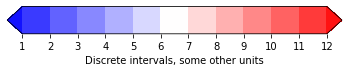

In [121]:
fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

cmap = mpl.cm.bwr
# cmap.set_over('0.25')
# cmap.set_under('0.75')

bounds = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
# norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
cb2 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                boundaries=[0] + bounds + [13],
                                extend='both',
                                ticks=bounds,
                                spacing='proportional',
                                orientation='horizontal')
cb2.set_label('Discrete intervals, some other units')
cb2.ax.set_yticklabels(np.arange(0.0,5.5,0.5))
fig.show()

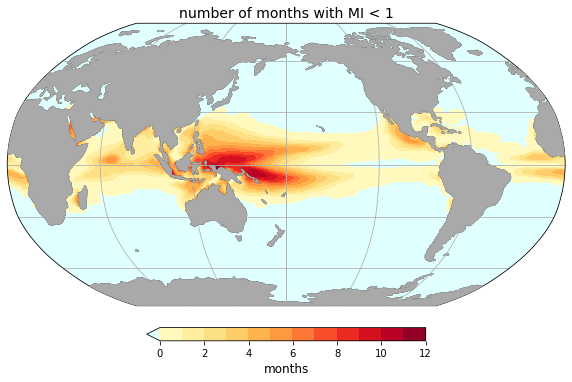

In [55]:
fig,ax = plt.subplots(figsize=(10,8),subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
im = map_months(ax, z0_red85, 'YlOrRd', 'number of months with MI < 1', 2100)
cbar = plt.colorbar(im,ax=ax,orientation='horizontal',fraction=0.05,pad=0.05,shrink=0.5)
cbar.set_label('months',fontsize=12)

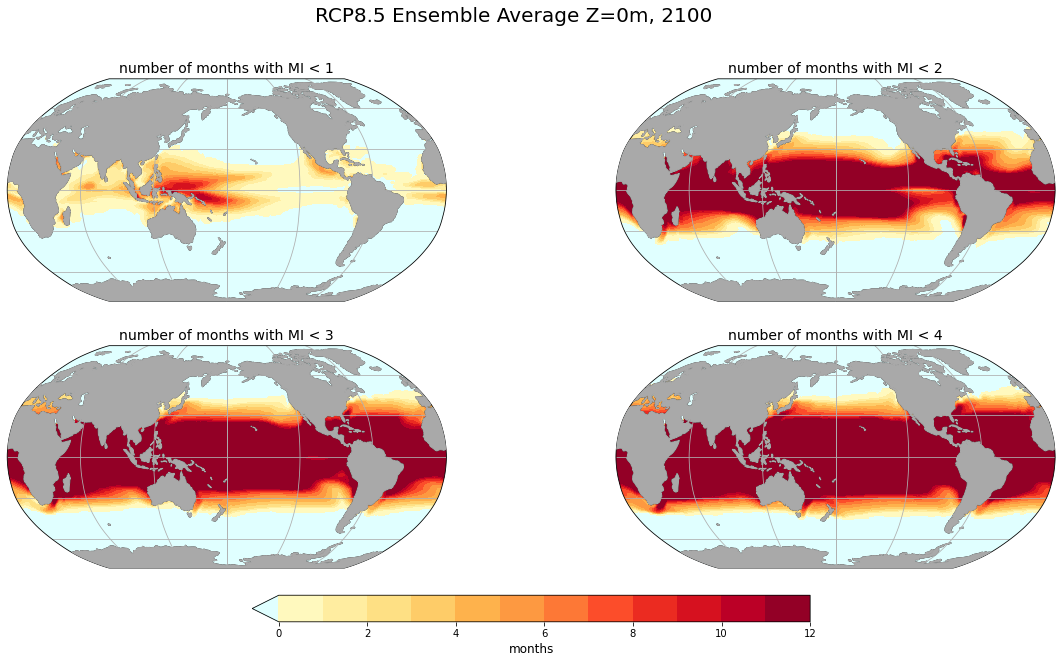

In [67]:
fig,axs = plt.subplots(figsize=(20,10),nrows=2,ncols=2,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig.suptitle('RCP8.5 Ensemble Average Z=0m, 2100',fontsize=20)
map_months(axs[0,0], z0_red85, 'YlOrRd', 'number of months with MI < 1', 2100)
map_months(axs[0,1], z0_or85, 'YlOrRd', 'number of months with MI < 2', 2100)
map_months(axs[1,0], z0_yel85, 'YlOrRd', 'number of months with MI < 3', 2100)
im = map_months(axs[1,1], z0_gr85, 'YlOrRd', 'number of months with MI < 4', 2100)
cbar = plt.colorbar(im,ax=axs,orientation='horizontal',fraction=0.05,pad=0.05,shrink=0.5)
cbar.set_label('months',fontsize=12)

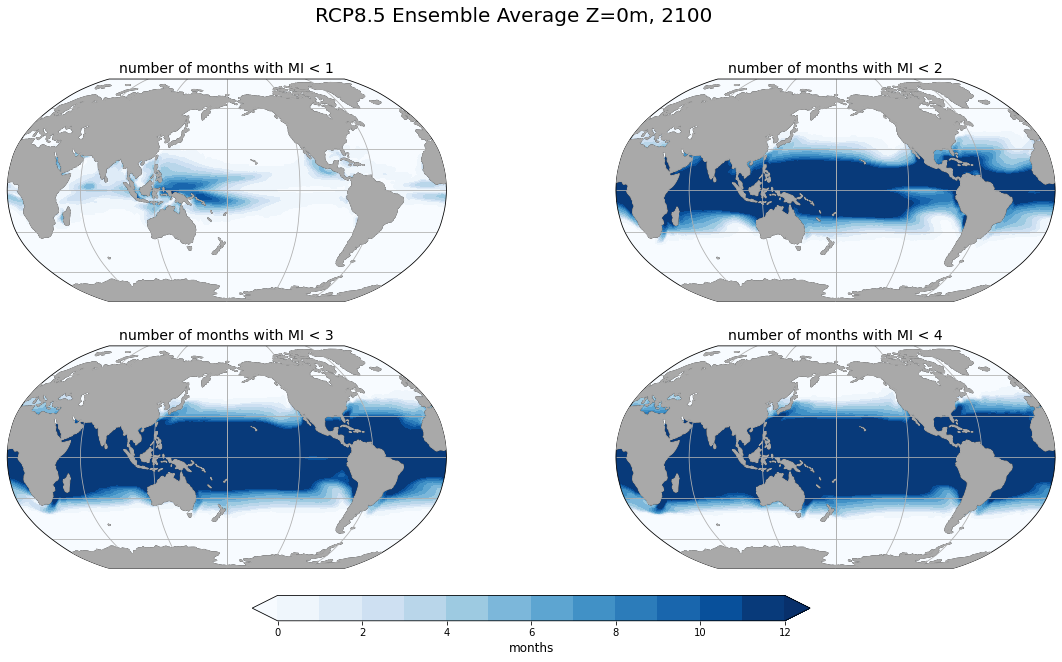

In [33]:
fig,axs = plt.subplots(figsize=(20,10),nrows=2,ncols=2,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig.suptitle('RCP8.5 Ensemble Average Z=0m, 2100',fontsize=20)
map_months(axs[0,0], ds_all, 'Blues', 'number of months with MI < 1', '2100', 1.0)
map_months(axs[0,1], ds_all, 'Blues', 'number of months with MI < 2', '2100', 2.0)
map_months(axs[1,0], ds_all, 'Blues', 'number of months with MI < 3', '2100', 3.0)
im = map_months(axs[1,1], ds_all, 'Blues', 'number of months with MI < 4', '2100', 4.0)
cbar = plt.colorbar(im,ax=axs,orientation='horizontal',fraction=0.05,pad=0.05,shrink=0.5)
cbar.set_label('months',fontsize=12)

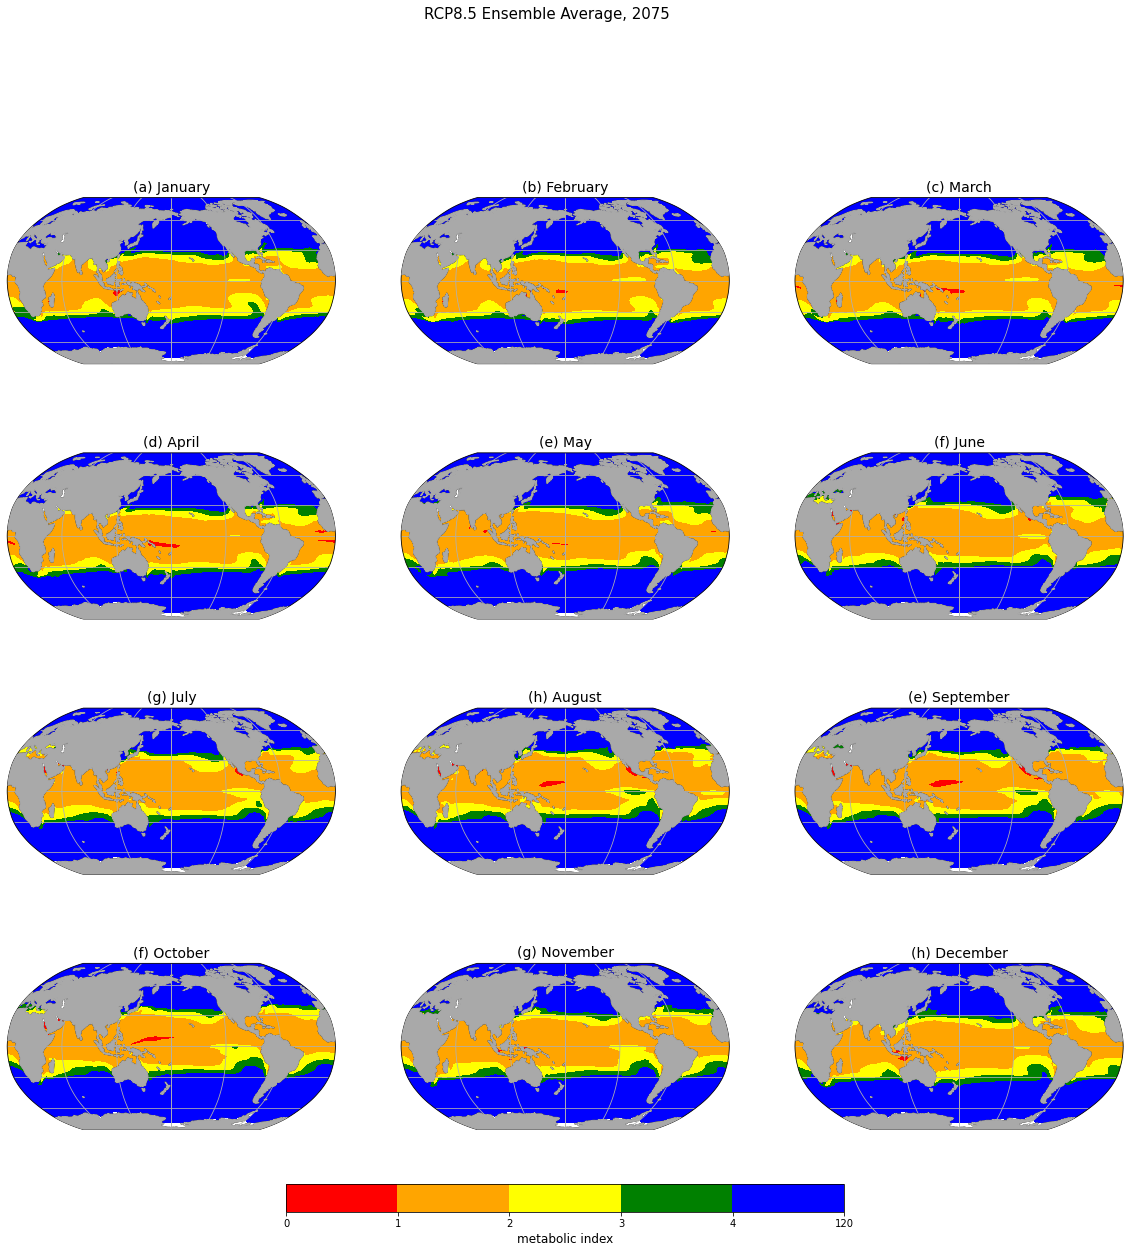

In [15]:
func.months_of_year(ds_avg, '2075', 'RCP8.5 Ensemble Average, 2075')

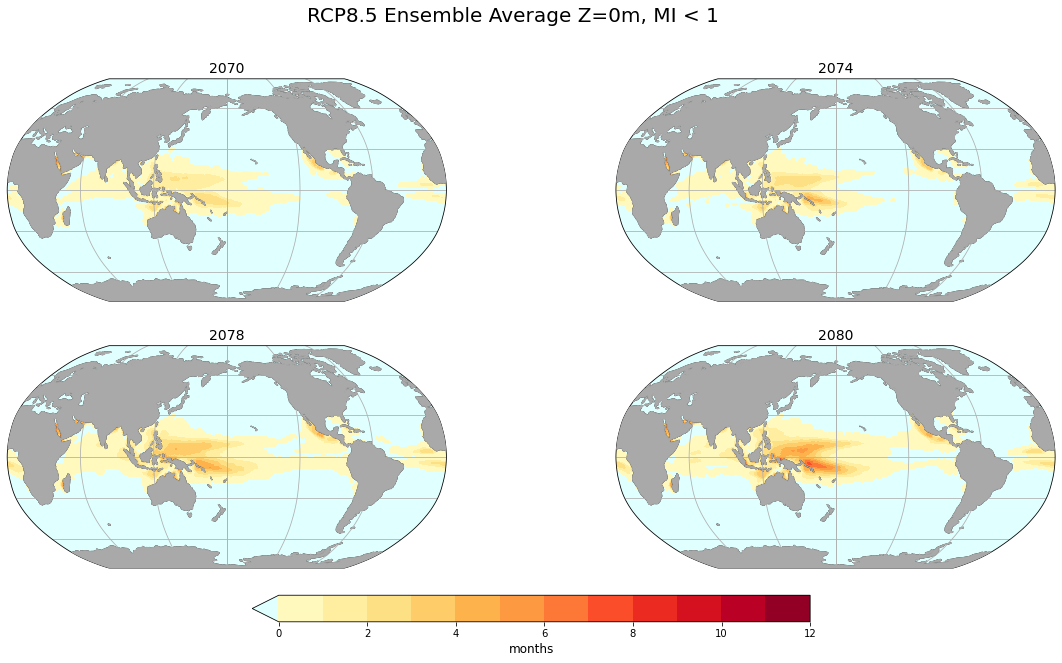

In [57]:
fig,axs = plt.subplots(figsize=(20,10),nrows=2,ncols=2,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig.suptitle('RCP8.5 Ensemble Average Z=0m, MI < 1',fontsize=20)
map_months(axs[0,0], z0_red85, 'YlOrRd', '2070', 2070)
map_months(axs[0,1], z0_red85, 'YlOrRd', '2074', 2074)
map_months(axs[1,0], z0_red85, 'YlOrRd', '2078', 2078)
im = map_months(axs[1,1], z0_red85, 'YlOrRd', '2080', 2080)
cbar = plt.colorbar(im,ax=axs,orientation='horizontal',fraction=0.05,pad=0.05,shrink=0.5)
cbar.set_label('months',fontsize=12)

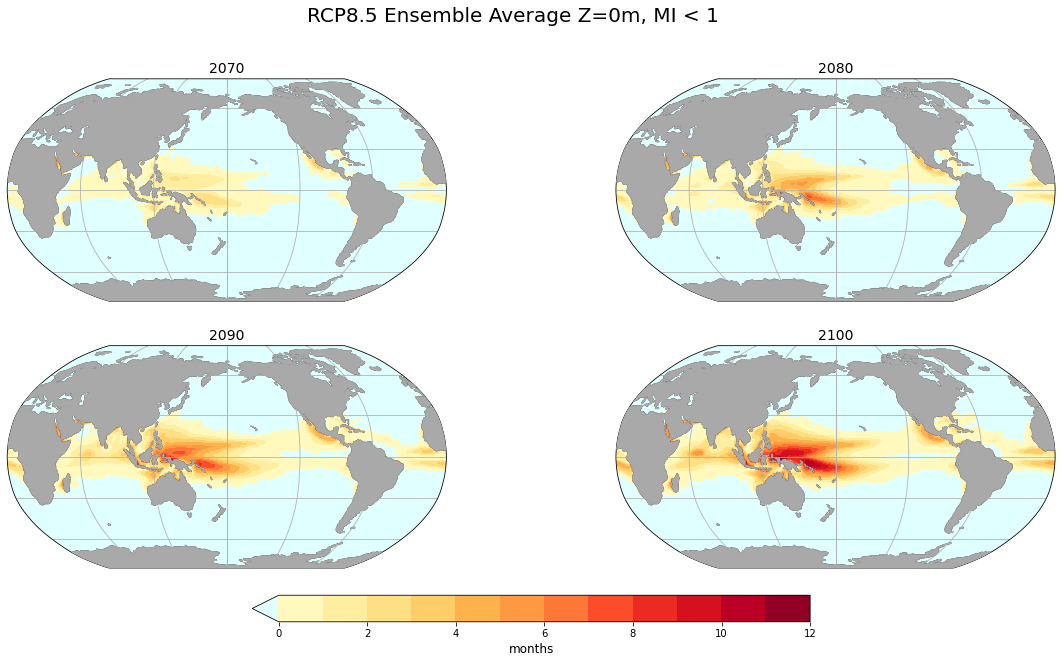

In [60]:
fig,axs = plt.subplots(figsize=(20,10),nrows=2,ncols=2,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig.suptitle('RCP8.5 Ensemble Average Z=0m, MI < 1',fontsize=20)
map_months(axs[0,0], z0_red85, 'YlOrRd', '2070', 2070)
map_months(axs[0,1], z0_red85, 'YlOrRd', '2080', 2080)
map_months(axs[1,0], z0_red85, 'YlOrRd', '2090', 2090)
im = map_months(axs[1,1], z0_red85, 'YlOrRd', '2100', 2100)
cbar = plt.colorbar(im,ax=axs,orientation='horizontal',fraction=0.05,pad=0.05,shrink=0.5)
cbar.set_label('months',fontsize=12)

Z=100m

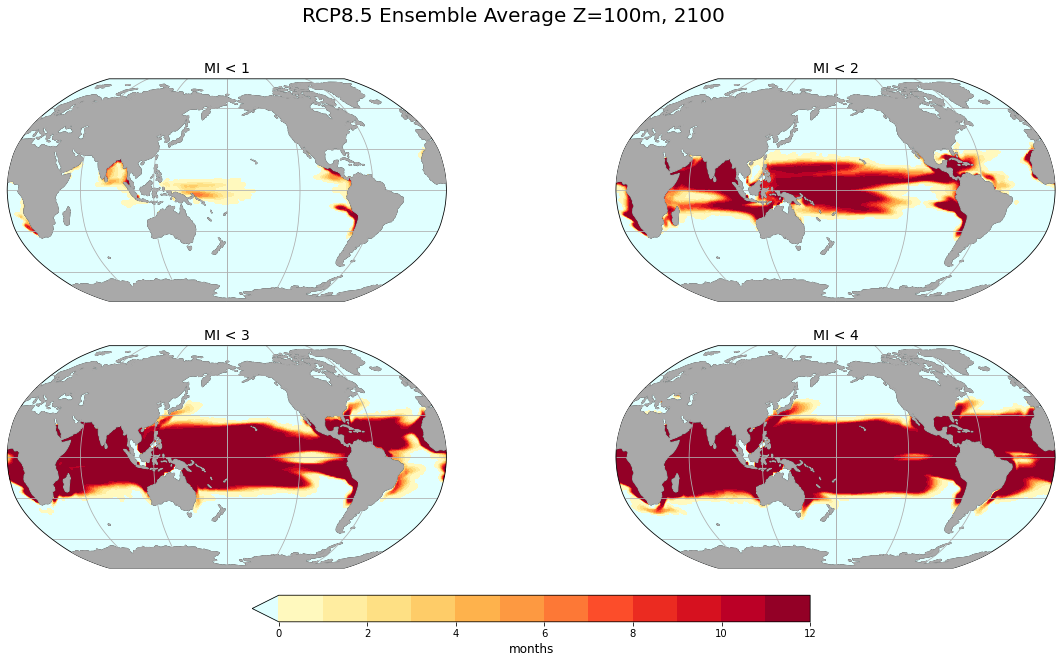

In [61]:
fig,axs = plt.subplots(figsize=(20,10),nrows=2,ncols=2,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig.suptitle('RCP8.5 Ensemble Average Z=100m, 2100',fontsize=20)
map_months(axs[0,0], k11_red85, 'YlOrRd', 'MI < 1', 2100)
map_months(axs[0,1], k11_or85, 'YlOrRd', 'MI < 2', 2100)
map_months(axs[1,0], k11_yel85, 'YlOrRd', 'MI < 3', 2100)
im = map_months(axs[1,1], k11_gr85, 'YlOrRd', 'MI < 4', 2100)
cbar = plt.colorbar(im,ax=axs,orientation='horizontal',fraction=0.05,pad=0.05,shrink=0.5)
cbar.set_label('months',fontsize=12)

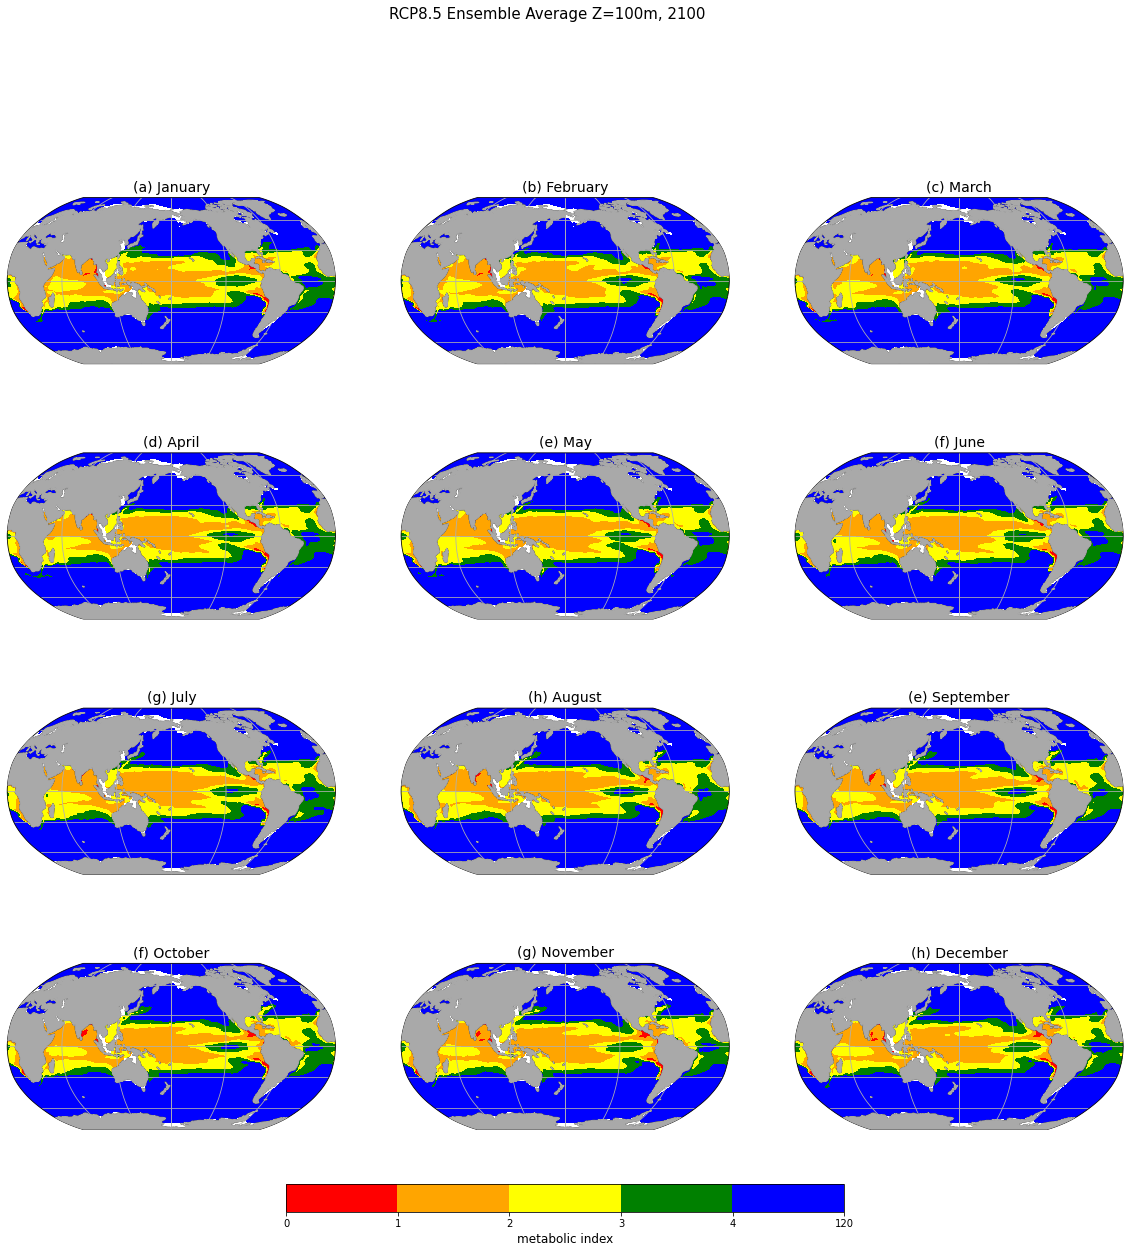

In [19]:
func.months_of_year(k11_avg, '2100', 'RCP8.5 Ensemble Average Z=100m, 2100')

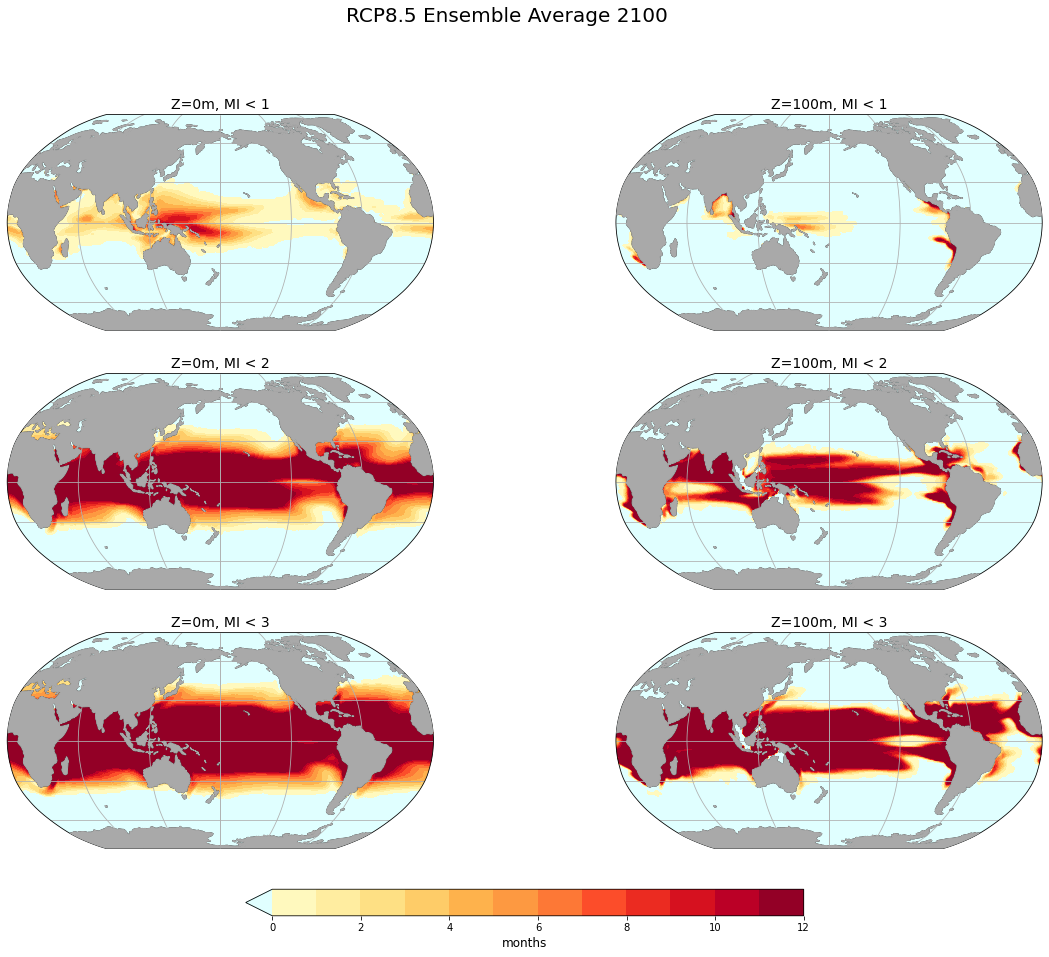

In [62]:
fig,axs = plt.subplots(figsize=(20,15),nrows=3,ncols=2,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig.suptitle('RCP8.5 Ensemble Average 2100',fontsize=20)
map_months(axs[0,0], z0_red85, 'YlOrRd', 'Z=0m, MI < 1', 2100)
map_months(axs[0,1], k11_red85, 'YlOrRd', 'Z=100m, MI < 1', 2100)
map_months(axs[1,0], z0_or85, 'YlOrRd', 'Z=0m, MI < 2', 2100)
map_months(axs[1,1], k11_or85, 'YlOrRd', 'Z=100m, MI < 2', 2100)
map_months(axs[2,0], z0_yel85, 'YlOrRd', 'Z=0m, MI < 3', 2100)
map_months(axs[2,1], k11_yel85, 'YlOrRd', 'Z=100m, MI < 3', 2100)
cbar = plt.colorbar(im,ax=axs,orientation='horizontal',fraction=0.05,pad=0.05,shrink=0.5)
cbar.set_label('months',fontsize=12)

RCP2.6

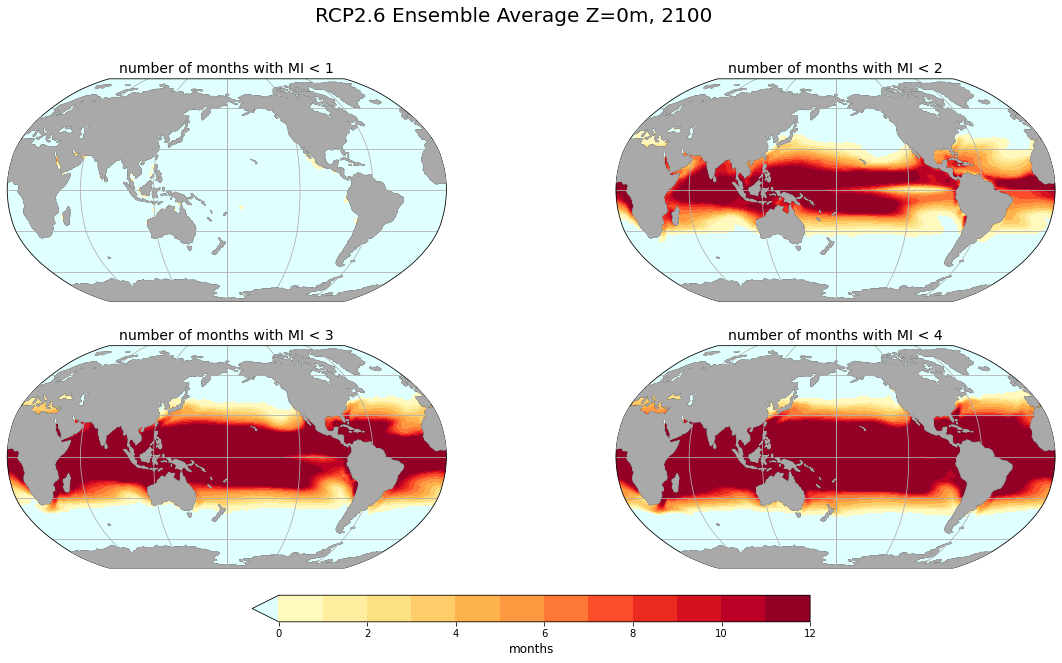

In [63]:
fig,axs = plt.subplots(figsize=(20,10),nrows=2,ncols=2,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig.suptitle('RCP2.6 Ensemble Average Z=0m, 2100',fontsize=20)
map_months(axs[0,0], z0_red26, 'YlOrRd', 'number of months with MI < 1', 2100)
map_months(axs[0,1], z0_or26, 'YlOrRd', 'number of months with MI < 2', 2100)
map_months(axs[1,0], z0_yel26, 'YlOrRd', 'number of months with MI < 3', 2100)
im = map_months(axs[1,1], z0_gr26, 'YlOrRd', 'number of months with MI < 4', 2100)
cbar = plt.colorbar(im,ax=axs,orientation='horizontal',fraction=0.05,pad=0.05,shrink=0.5)
cbar.set_label('months',fontsize=12)

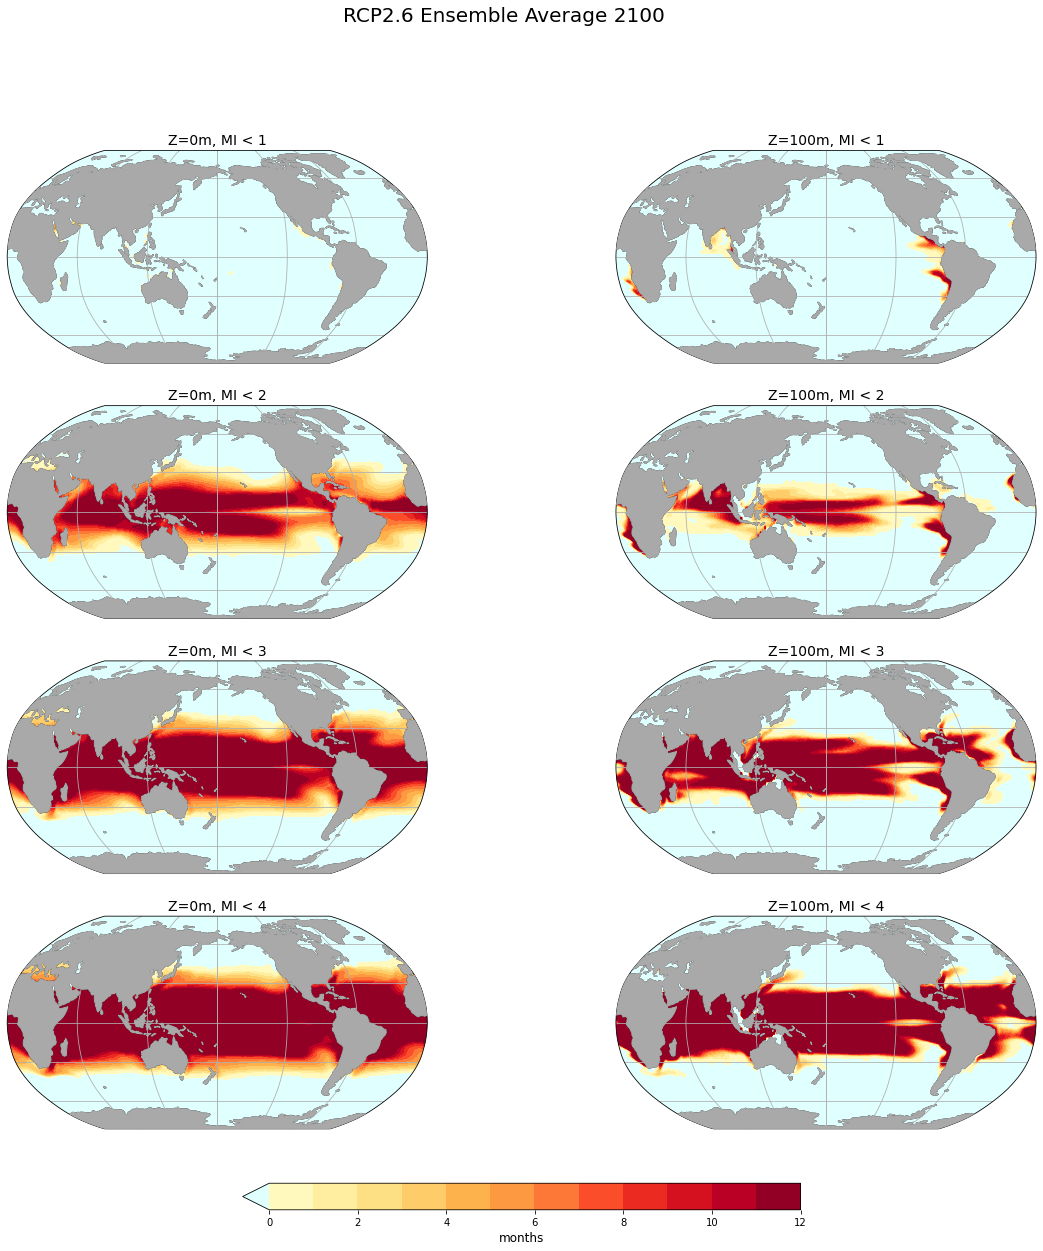

In [64]:
fig,axs = plt.subplots(figsize=(20,20),nrows=4,ncols=2,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig.suptitle('RCP2.6 Ensemble Average 2100',fontsize=20)
map_months(axs[0,0], z0_red26, 'YlOrRd', 'Z=0m, MI < 1', 2100)
map_months(axs[0,1], k11_red26, 'YlOrRd', 'Z=100m, MI < 1', 2100)
map_months(axs[1,0], z0_or26, 'YlOrRd', 'Z=0m, MI < 2', 2100)
map_months(axs[1,1], k11_or26, 'YlOrRd', 'Z=100m, MI < 2', 2100)
map_months(axs[2,0], z0_yel26, 'YlOrRd', 'Z=0m, MI < 3', 2100)
map_months(axs[2,1], k11_yel26, 'YlOrRd', 'Z=100m, MI < 3', 2100)
map_months(axs[3,0], z0_gr26, 'YlOrRd', 'Z=0m, MI < 4', 2100)
im = map_months(axs[3,1], k11_gr26, 'YlOrRd', 'Z=100m, MI < 4', 2100)
cbar = plt.colorbar(im,ax=axs,orientation='horizontal',fraction=0.05,pad=0.05,shrink=0.5)
cbar.set_label('months',fontsize=12)

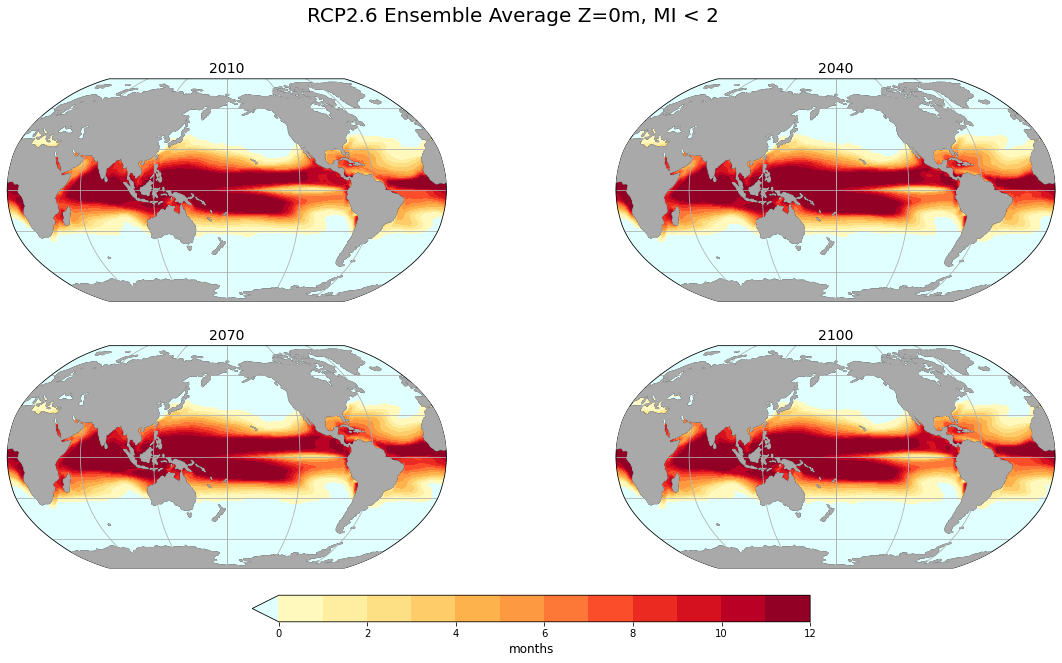

In [65]:
fig,axs = plt.subplots(figsize=(20,10),nrows=2,ncols=2,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig.suptitle('RCP2.6 Ensemble Average Z=0m, MI < 2',fontsize=20)
map_months(axs[0,0], z0_or26, 'YlOrRd', '2010', 2010)
map_months(axs[0,1], z0_or26, 'YlOrRd', '2040', 2040)
map_months(axs[1,0], z0_or26, 'YlOrRd', '2070', 2070)
im = map_months(axs[1,1], z0_or26, 'YlOrRd', '2100', 2100)
cbar = plt.colorbar(im,ax=axs,orientation='horizontal',fraction=0.05,pad=0.05,shrink=0.5)
cbar.set_label('months',fontsize=12)

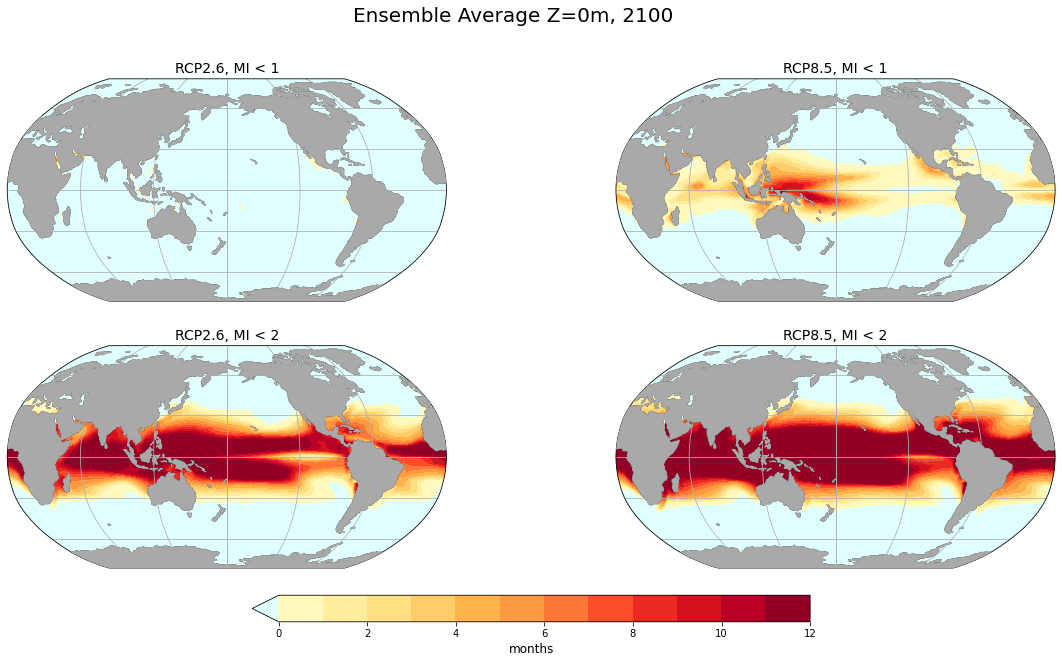

In [66]:
fig,axs = plt.subplots(figsize=(20,10),nrows=2,ncols=2,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig.suptitle('Ensemble Average Z=0m, 2100',fontsize=20)
map_months(axs[0,0], z0_red26, 'YlOrRd', 'RCP2.6, MI < 1', 2100)
map_months(axs[0,1], z0_red85, 'YlOrRd', 'RCP8.5, MI < 1', 2100)
map_months(axs[1,0], z0_or26, 'YlOrRd', 'RCP2.6, MI < 2', 2100)
im = map_months(axs[1,1], z0_or85, 'YlOrRd', 'RCP8.5, MI < 2', 2100)
cbar = plt.colorbar(im,ax=axs,orientation='horizontal',fraction=0.05,pad=0.05,shrink=0.5)
cbar.set_label('months',fontsize=12)

ENSEMBLE COMPARISONS

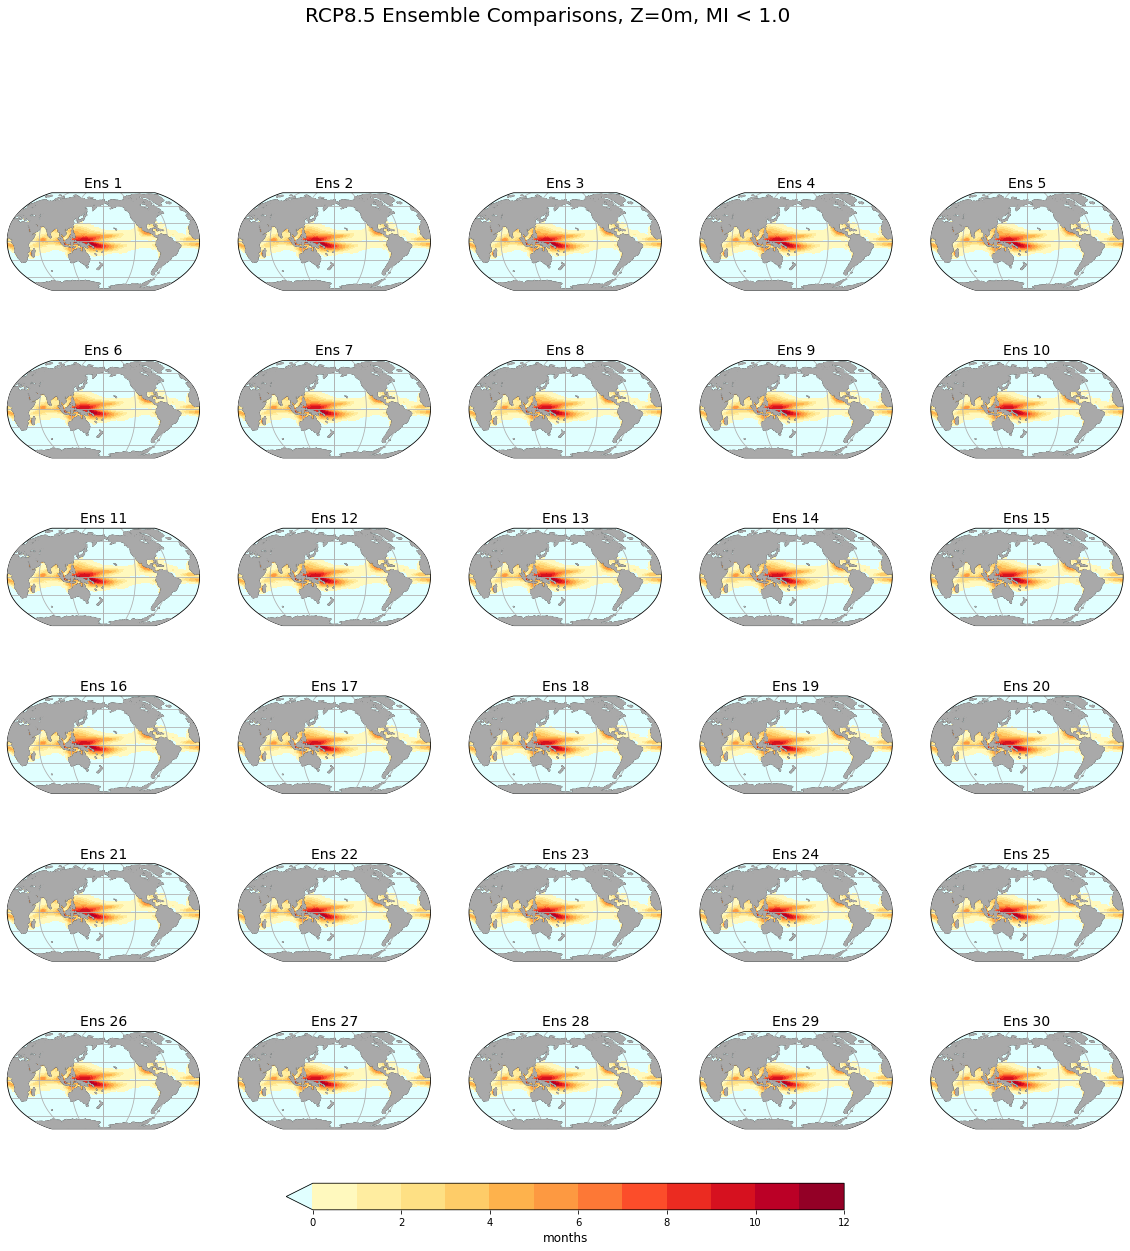

In [69]:
fig, axs = plt.subplots(figsize=(20,20),nrows=6,ncols=5, subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig.suptitle('RCP8.5 Ensemble Comparisons, Z=0m, MI < 1.0',fontsize=20)
wn.filterwarnings('ignore')
ensNum = 0
for row in range(6):
    for col in range(5):
        ds_ens = ds_all.sel(ensemble=ensNum)
        im = map_months(axs[row,col], z0_red85, 'YlOrRd', 'Ens '+str(ensNum+1), 2100)
        ensNum += 1
cbar = plt.colorbar(im,ax=axs,orientation='horizontal',fraction=0.05,pad=0.05,shrink=0.5)
cbar.set_label('months',fontsize=12)

TIME OF EMERGENCE

In [14]:
da_rcp85 = []
# da_rcp85.append('placeholder')
for i in range(1,13):
    da_emerge = z0_red85.year.where(z0_red85>=i).min(dim='year')
    da_rcp85.append(da_emerge)

In [25]:
z0_red85.sel(year=2100).where(z0_red85>1).min(dim='year')

<xarray.Dataset>
Dimensions:   (xt_ocean: 360, yt_ocean: 180)
Coordinates:
    st_ocean  float64 5.0
  * yt_ocean  (yt_ocean) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * xt_ocean  (xt_ocean) float64 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
Data variables:
    MI        (yt_ocean, xt_ocean) float64 dask.array<chunksize=(180, 360), meta=np.ndarray>

In [19]:
ds = ds_avg.where(ds_avg['MI']<1.0).groupby('time.year').min(dim='time')

/home/aos/ystochel/miniconda3/envs/esm2m/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in less
  return func(*(_execute_task(a, cache) for a in args))
/home/aos/ystochel/miniconda3/envs/esm2m/lib/python3.8/site-packages/dask/utils.py:30: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/home/aos/ystochel/miniconda3/envs/esm2m/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))


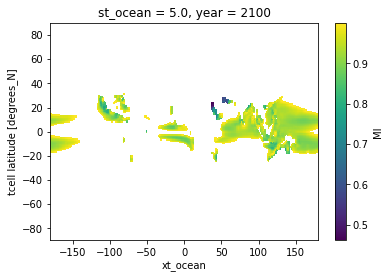

In [22]:
ds['MI'].sel(year=2100).plot()